#### Importing Necessary Libraries

In [1]:
import matplotlib.image as mpImg 
import matplotlib.pyplot as plt
import os
import numpy as np

from sklearn import metrics
from tabulate import tabulate

#### Defining Constants

In [2]:
ManU = 0
Chelsea = 1

#### Reading the Image

In [3]:
def loadImgFromFolder(folderPath):
    images = []
    imagesName = []
    
    for fileName in os.listdir(folderPath):
        img = mpImg.imread(os.path.join(folderPath, fileName))
        if img is not None:
            images.append(img)
            imagesName.append(fileName.replace('.jpg', ''))
            
    return images, imagesName

#### Averaging RGB

In [4]:
def calcAvgRGB(images):
    numImages = len(images)
    avgRGB = np.zeros([numImages,3])
    
    for i in range(0,numImages):
        avgRGB[i,:] = np.average(np.average(images[i], axis=0), axis=0)
        
    return avgRGB

#### Finding Labels

In [5]:
def findLabels(imageNames):
    numImageNames = len(imageNames)
    labels = np.zeros(numImageNames)
    
    for i in range(0, numImageNames):
        if imageNames[i][0] == 'c' or imagesNames[i] == 'index':
            labels[i] = Chelsea 
    return labels

#### Creating the Classifier

In [6]:
distCalc = lambda x,y: np.sqrt(abs(x[0]-y[0])**2+abs(x[2]-y[2])**2)

def RGBClassfier(avgRGBPic):
    refColors = {'Red':[255, 0, 0], 'Blue':[0, 0, 255]}
    dist = [distCalc(avgRGBPic, refColors[i]) for i in refColors.keys()] 
    return ManU if dist.index(min(dist)) == 0 else Chelsea

#### Predicting Labels

In [7]:
def predLabels(avgRGB):
    predtLabels = []
    predtLabels.append([RGBClassfier(avgRGB[i]) for i in range(len(avgRGB))])
    return predtLabels[0]

#### Calculate Confusion Matrix

In [8]:
def calcConfsMat(trueLabels, predtLabels):
    if not type(predtLabels) == np.array:
        predtLabels = np.array(predtLabels)
    if not type(trueLabels) == np.array:
        trueLabels = np.array(trueLabels)
        
    return metrics.confusion_matrix(trueLabels, predtLabels)

#### Calculate Confidence Matrix

In [9]:
def calcConfMat(confsMat):
    row_sums = confsMat.sum(axis=1)
    return confsMat / row_sums[:, np.newaxis]

#### Plot Table Beautifully

In [10]:
def plotTable(clmData1, clmData2, clmData3, clmDataHeadears):
    data = []
    for i in range(len(clmData1)):
        data.append([clmData1[i], '{:1.2f}'.format(clmData2[i]), 
                     '{:1.2f}'.format(clmData3[i])])
        
    print(tabulate(data, headers=clmDataHeadears, tablefmt="fancy_grid", 
                   colalign=("center",)))

#### Calculate and Show Correct Classification Rate

In [11]:
def calcShowCCR(trueLabel, predLabel):
    matrix = metrics.confusion_matrix(trueLabel, predLabel)
    num = sum(matrix[i][i] for i in range(len(matrix)))
    denum = matrix.sum()
    CRR =num/denum
    print("* Correct classification rate after employing this classifier is: %1.3f"%(CRR))

#### Calculate and Show Accuracy, Recall, and Percision

In [12]:
def calcAccRcllPer(trueLabel, predLabel):
    accuracy = metrics.accuracy_score(trueLabel, predLabel)
    print('* Accuracy score after employing this classifier is: %1.3f' %(accuracy))
    print('\n')
        
    recallManU = metrics.recall_score(trueLabel, predLabel, pos_label=0)
    recallChelsea = metrics.recall_score(trueLabel, predLabel, pos_label=1)
    
    percisionManU = metrics.precision_score(trueLabel, predLabel, pos_label=0)
    percisionChelsea = metrics.precision_score(trueLabel, predLabel, pos_label=1)
    
    plotTable(["Man United", "Chelsea"], [recallManU, recallChelsea], 
                  [percisionManU, percisionChelsea], 
                  ['Club Names', "Recall", "Percision"])

#### Plot Matrix Beautifully :)

In [22]:
def plotBeautyMat(matrix, labels, numType, matrixType):
    figure = plt.figure() 
    axes = figure.add_subplot() 
    axLabels = labels
    
    caxes = axes.matshow(matrix, cmap= 'Purples')
    
    axes.set_xticklabels(['']+labels) 
    axes.set_yticklabels(['']+labels)
    
    for (i, j), z in np.ndenumerate(matrix):
        axes.text(j, i, numType.format(z), ha='center', va='baseline', color='mediumpurple')
        
    figure.colorbar(caxes) 
    plt.ylabel('True Labels', fontsize=10, fontweight='bold')
    plt.xlabel('Predicted Lables', fontsize=10, fontweight='bold')
    figure.suptitle(matrixType, fontsize=10, fontweight='bold')
    plt.show() 
   

#### Employing Abvove Functions

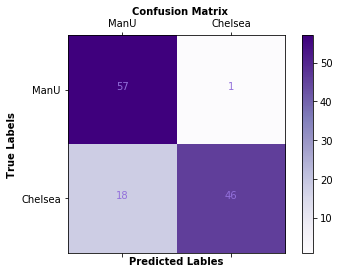

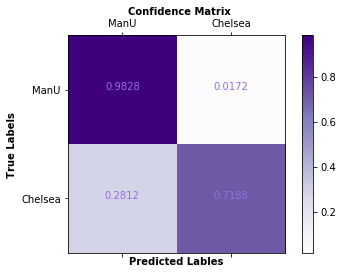

* Correct classification rate after employing this classifier is: 0.844
* Accuracy score after employing this classifier is: 0.844


╒══════════════╤══════════╤═════════════╕
│  Club Names  │   Recall │   Percision │
╞══════════════╪══════════╪═════════════╡
│  Man United  │     0.98 │        0.76 │
├──────────────┼──────────┼─────────────┤
│   Chelsea    │     0.72 │        0.98 │
╘══════════════╧══════════╧═════════════╛


In [23]:
folderPath = "/home/atena/Desktop/Pattern Recognition/HW/1/Q6_Dataset"
#Loading Images:
images, imagesNames = loadImgFromFolder(folderPath)
#Finding the Average RGB:
avgRGB = calcAvgRGB(images)
#Finding MacU and Chelsea Labels:
trueLabels = findLabels(imagesNames)
#Predicting labels using classifier:
predtLabels = predLabels(avgRGB)
#Finding and plotting confusion matrix:
confsMat = calcConfsMat(trueLabels, predtLabels)
plotBeautyMat(confsMat, ['ManU', 'Chelsea'], '{:d}', 'Confusion Matrix')
#Finding and plotting confidence matrix:
confMat = calcConfMat(confsMat)
plotBeautyMat(confMat, ['ManU', 'Chelsea'], '{:1.4f}', 'Confidence Matrix')
#Calculating CCR, accuracy, recall, and percision
calcShowCCR(trueLabels,predtLabels)
calcAccRcllPer(trueLabels, predtLabels)